## I denna kodcell placeras modulimporter och egendefinerade funktioner som används i flera deluppgifter

In [67]:
#Importerar moduler
import csv
import matplotlib.pyplot as plt
import numpy as np

#Funktion som omvandlar CSV fil till en lista av listor som innehåller raderna i CSV filen
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as csv_file:
        dataset = []
        csv_reader = csv.reader(csv_file, delimiter=";")
        for line in csv_reader:
            dataset.append(line)
    return dataset

#Funktion som skriver ut de 3 första raderna
def print_3_first_row(data):
    for i in range(0,3,1):
        print(data[i])


#En funktion som hämtar användare input och kontrollerar den så att man inte kan ge fel input
def get_year_input():
    while True:
        år = input("Välj ett år mellan 2018-2023: ")
        if år in ["2018", "2019", "2020", "2021", "2022", "2023"]:
            return år
        else:
            print("Fel inmatning var vänlig ange ett år mellan 2018-2023")

#Samma som funktionen ovan fast för prisområde
def get_prisområde():
    while True:
        prisområde = input("Välj ett prisområde mellan 1-4 :")
        if prisområde in ["1", "2", "3", "4"]:
            return prisområde
        else:
            print("Fel prisområde ange ett nummer mellan 1-4")

#Samma som funktionen ovan fast för Villa eller lägenhetskund
def get_customer_input():
    while True:
        customer = input("Lägenhetskund (L) eller villakund (V)? : ")
        if customer in ["V", "L", "v", "l"]:
            return customer
        else:
            print("Fel inmatning skriv V eller L")

#Samma som funktionen ovan fast för prisavtal
def get_prisavtal():
    while True:
        prisvatal = input("Ange prisavtal (R, F1, F3)")
        if prisvatal in ["R", "r", "F1", "f1", "F3", "f3"]:
            return prisvatal.upper()
        else:
            print("Fel inmatning skriv något av R, F1, F3")

#Funktion som räknar ut avrage
def calculate_avg(column_index, data):
    #Skapar en tom lista för att fylla med värden som genomsnitt ska beräknas på.
    list_of_column_values = []
    #Lägger in datan efter vilket column index som är inlagt.
    for line in data:
        list_of_column_values.append(line[column_index])

    #Skapar en variabel som håller totala värdet av alla värden fetrsom det behövs för beräkningen
    sum_lista_float = 0
    #Summerar alla värden i list_of_column_values och lägger totalen i sum_lista_float. Omformaterar till float också
    for i in list_of_column_values:
        sum_lista_float =  float(i) + sum_lista_float

    #Beräknar antale object i listan med funktionen len
    objects_in_lis = len(list_of_column_values)

    #Gör beräkningen summa/antal
    avg = sum_lista_float / objects_in_lis

    #Avrundar resultatet till 2 decimaler
    avg_rounded = round(avg, 2)
    #Retunerar genomsnittet
    return avg_rounded


#Funktion som beräknar min och max värden samt vilken månad värden var.
#Funktion retunerar värden i en två dimensionell lista på följande sätt.
#[[min_value, max_value],[min_month, max_month]]
def get_min_max_value(column_index, data):
    #Skapar en tom lista för att fylla med värden som genomsnitt ska beräknas på.
    list_of_column_values = []
    for line in data:
        #Lägger in datan efter vilket column index som är inlagt. Omformaterar till float också.
        list_of_column_values.append(float(line[column_index]))
    #Sorterar datan i storleks ordning
    sorted_dataset = sorted(list_of_column_values)
    #Hämtar det första värdet genom index 0 och sätter till variabeln min
    min = sorted_dataset[0]
    #Hämtar det sista värdet genom index -1 och sätter till variabeln max
    max = sorted_dataset[-1]
    #Lägger in värderna i en lista
    min_max_value = []
    min_max_value.append(min)
    min_max_value.append(max)

    #Hämtar månaden för min värdet
    min_max_month = []
    #Går igenom datan och hittar vart värdet förekommer
    for line in data:
        if line[column_index] == str(min):
            #Där värdet förekommer tar den månaden och lägger till i listan
            min_max_month.append(line[1][:3])

    #Utför ssamma procedur som ovan fast för max värdet
    for line in data:
        if line[column_index] == str(max):
            min_max_month.append(line[1][:3])

    #Hämtar året för min värdet
    min_max_year = []
    #Går igenom datan och hittar vart värdet förekommer
    for line in data:
        if line[column_index] == str(min):
            #Där värdet förekommer tar den månaden och lägger till i listan
            min_max_year.append(line[0])

    #Utför ssamma procedur som ovan fast för max värdet
    for line in data:
        if line[column_index] == str(max):
            min_max_year.append(line[0])

    #Slår ihop listorna till en
    min_max = [min_max_value, min_max_month, min_max_year]
    #Retunerar den ihopslagna listan
    return min_max    

## Deluppgift 1
Ev. kommentar:

In [56]:
def main_deluppgift1():
    #Använder den tidigare funktionen för att ange listorna till lokala variabler som kan anävndas
    lghData = read_file("lghpriser.csv")
    villaData = read_file("villapriser.csv")


    #Skriver ut de tre första raderna
    print("Lägenhets Priser:")
    print_3_first_row(lghData)
    print("")
    print("Villa Priser:")
    print_3_first_row(villaData)
    print("")

main_deluppgift1()

Lägenhets Priser:
['Ar', 'manad', 'SE1-Fast pris 1 ar', 'SE1-Fast pris 3 ar', 'SE1-Rorligt pris', 'SE2-Fast pris 1 ar', 'SE2-Fast pris 3 ar', 'SE2-Rorligt pris', 'SE3-Fast pris 1 ar', 'SE3-Fast pris 3 ar', 'SE3-Rorligt pris', 'SE4-Fast pris 1 ar', 'SE4-Fast pris 3 ar', 'SE4-Rorligt pris']
['2018', 'januari', '64.12', '63.98', '67.81', '63.87', '63.76', '67.92', '64.95', '65.31', '68.28', '66.07', '66.34', '69.38']
['2018', 'februari', '66.01', '64.29', '77.14', '65.82', '63.96', '77.42', '67.04', '65.54', '77.96', '68.02', '66.58', '78.91']

Villa Priser:
['Ar', 'Manad', 'SE1-Fast pris 1 ar', 'SE1-Fast pris 3 ar', 'SE1-Rorligt pris', 'SE2-Fast pris 1 ar', 'SE2-Fast pris 3 ar', 'SE2-Rorligt pris', 'SE3-Fast pris 1 ar', 'SE3-Fast pris 3 ar', 'SE3-Rorligt pris', 'SE4-Fast pris 1 ar', 'SE4-Fast pris 3 ar', 'SE4-Rorligt pris']
['2018', 'januari', '49.39', '48.71', '50.4', '49.4', '48.7', '50.59', '50.49', '50.17', '50.81', '51.82', '51.17', '51.81']
['2018', 'februari', '51.23', '48.99', '6

## Deluppgift 2
Ev. kommentar:

1


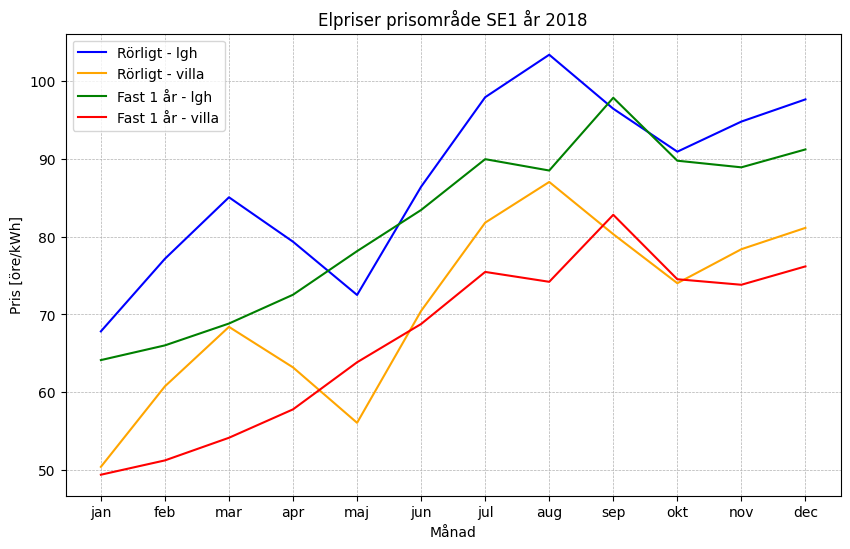

In [57]:
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")

#Huvudfunktion för deluppgiften
def main_deluppgift2(lghData, villaData):

    #Definerar värderna på x-axeln eftersom de är statiska oberoende av kund/användare val
    x_values = ["jan", "feb", "mar", "apr", "maj", "jun", "jul", "aug", "sep", "okt", "nov", "dec"]

    #Hämtar user input
    år = get_year_input()
    prisområde = get_prisområde()

    #Andvänder denna för att omvandla valet av prisområde till det index jag behöver i datan
    if prisområde == "1":
        Fast_index = 2
        Rör_index = 4
        print(1)
    elif prisområde == "2":
        Fast_index = 5
        Rör_index = 7
        print(2)
    elif prisområde == "3":
        Fast_index = 8
        Rör_index = 10
        print(3)
    else:
        Fast_index = 11
        Rör_index = 13
        print(4)

    #Splittar datan för villa samt lägenhet och tar ut endast den data som är för det valada året.
    year_list_lgh = []
    for line in lghData:
        if line[0] == år:
            year_list_lgh.append(line)

    year_list_villa = []
    for line in villaData:
        if line[0] == år:
            year_list_villa.append(line)

    #Skapar två listor för alla värderna så att de kan användas i grafen
    rörligt_lägenhet = []
    fast_lägenhet = []
    for line in year_list_lgh:
        rörligt_lägenhet.append(float(line[Rör_index]))
        fast_lägenhet.append(float(line[Fast_index]))

    rörligt_villa = []
    fast_villa = []
    for line in year_list_villa:
        rörligt_villa.append(float(line[Rör_index]))
        fast_villa.append(float(line[Fast_index]))

    #Skapar grafen nedan

    #Sätter grafens storlek
    plt.figure(figsize=(10, 6))
    
    #Matar in datan
    plt.plot(x_values, rörligt_lägenhet, label="Rörligt - lgh", color="blue")
    plt.plot(x_values, rörligt_villa, label="Rörligt - villa", color="orange")

    plt.plot(x_values, fast_lägenhet, label="Fast 1 år - lgh", color="green")
    plt.plot(x_values, fast_villa, label="Fast 1 år - villa", color="red")

    # Lägger till titlar och ettiketter
    plt.title(f"Elpriser prisområde SE{prisområde} år {år}")
    plt.xlabel("Månad")
    plt.ylabel("Pris [öre/kWh]")
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding grid lines

    #Visar graf
    plt.show()

main_deluppgift2(lghData, villaData)


## Deluppgift 3
Ev. kommentar:



                        Analys av elpriserna för kategorin lägenhetskund år 2020                        


              rörligt pris (öre/kWh)                              fast pris 3 år (öre/kWh)           
Prisomr.  min -- (mån) max -- (mån)  medel    median        min -- (mån)  max -- (mån)  medel  median
------------------------------------------------------------------------------------------------------
SE1       35.28   apr  59.49   jan    46.26    47.2          60.64   dec  73.59   jan    64.96   63.88
SE2       34.66   apr  60.13   jan    46.09    47.03         60.76   dec  73.48   jan    64.86   63.77
SE3       37.81   jul  71.51   aug    55.95    57.31         63.83   aug  76.21   jan    67.17   66.06
SE4       45.42   maj  79.9    aug    62.98    61.17         66.84   aug  78.67   jan    70.61   69.54


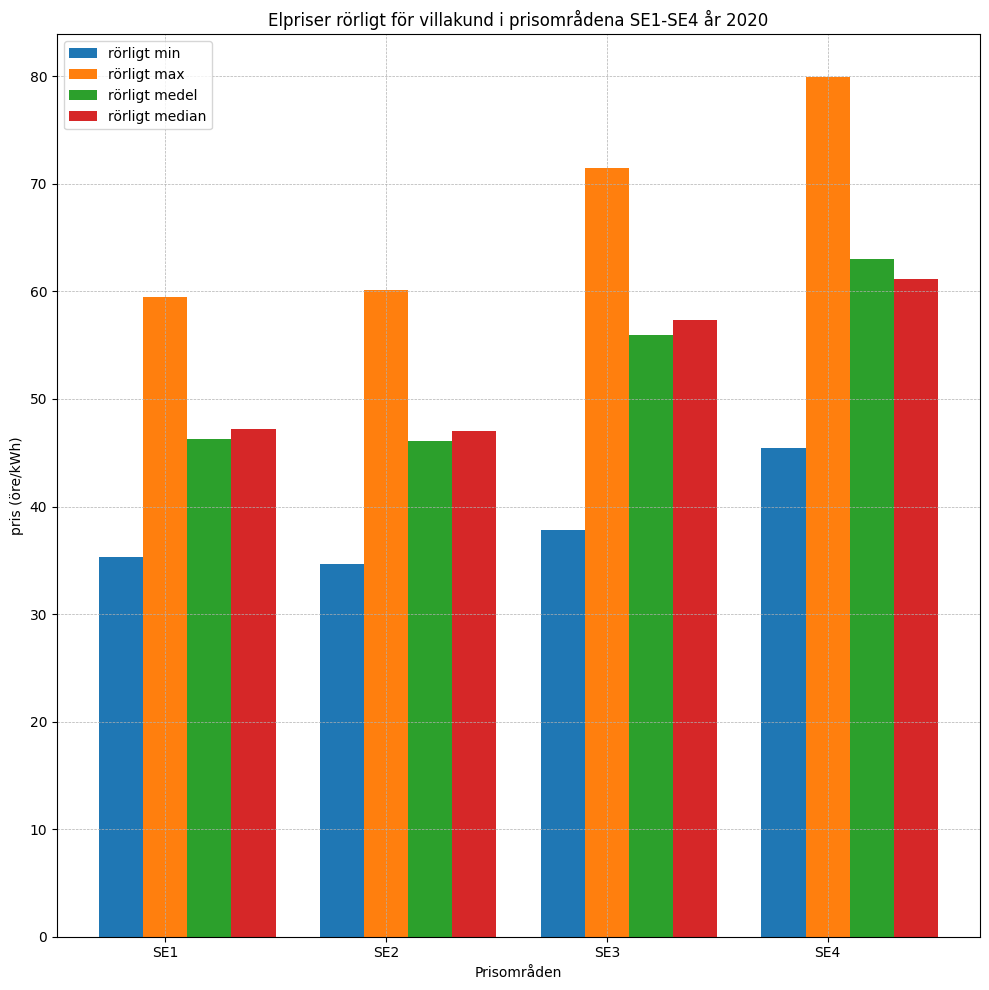

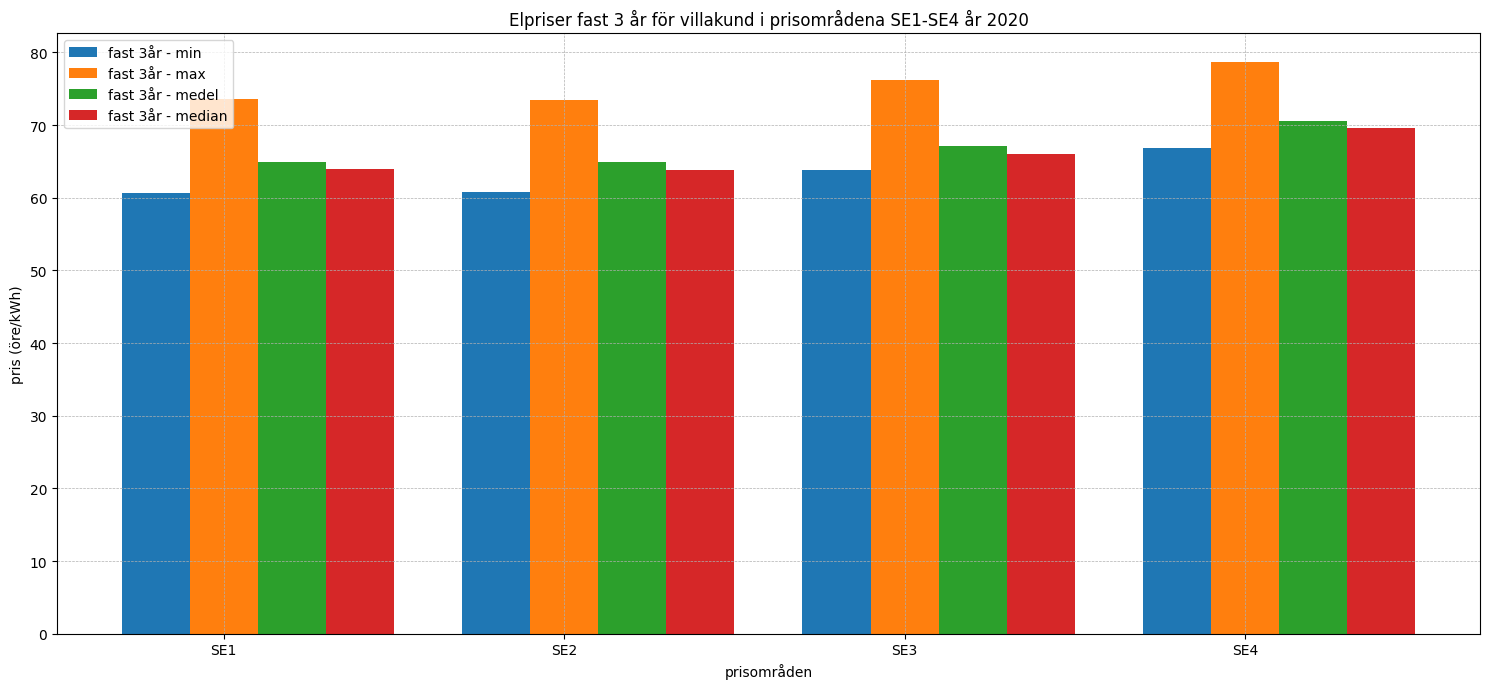

In [64]:
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")

#Funktion som beräknar medianen
def calculate_median(column_index, data):
    #Skapar en tom lista för att fylla med värden som genomsnitt ska beräknas på.
    list_of_column_values = []

    #Lägger in datan efter vilket column index som är inlagt. Omformaterar till float också
    for line in data:
        list_of_column_values.append(float(line[column_index]))

    #Sorterar datan i storleksordning
    sorted_dataset = sorted(list_of_column_values)

    #Räknar antal tal som finns med i datan
    object_count = len(sorted_dataset)

    #Kollar om datan är ett ojämnt antal
    if object_count % 2 == 1:
        #Om det är ett omjänt antal kan jag ta mittersta talet i den sorterade listan.
        #Detta gör jag genom att ta antalet object i listan delat på två avrundat nedåt som index.
        #Detta funkar eftersom index börjar på 0.
        #Exempel om det finns 5 tal sorterade så vill jag ha talet som finns på 3dje plats (index 2).
        #Om jag tar 5//2 (avrundat nedåt genom dubbel //) får jag 2 vilket är samma som indexet
        #Därav object_count//2
        median = sorted_dataset[object_count//2]
    
    #Om det är jämnt beräknar jag medelvärdet av de två centrerade värderna.
    else:
        first_value = sorted_dataset[object_count//2-1]
        second_value = sorted_dataset[object_count//2]
        median = (first_value + second_value) / 2
    
    #Avrundar median till två decimaler
    median_rounded = round(median, 2)
    #Retunerar avrundad median
    return median_rounded


#Huvudfunktionen för deluppgift 3 
def main_deluppgift3():

    #Hämtar kund inmatning
    customer_input = get_customer_input ()
    år = get_year_input ()

    #Skär ner datan till det relevanta året för lägenhet
    year_list_lgh = []
    for line in lghData:
        if line[0] == år:
            year_list_lgh.append(line)

    #Skär ner datan till det relevanta året för lägenhet
    year_list_villa = []
    for line in villaData:
        if line[0] == år:
            year_list_villa.append(line)

    #Beroende på customer input definerar vi variabeln data till den korrekta datan.
    #Vi definerar även en string så att den kan skrvias ut i rubriken
    if customer_input in ["V", "v"]:
        data = year_list_villa
        kund = "villakund"
    else:
        data = year_list_lgh
        kund = "lägenhetskund"

    #Definerar index för de olika kolumnerna för enklare hantering och renare kod.
    #Prisområde SE1
    SE1_fast_3_index = 3
    SE1_rör = 4
    #Prisområde SE2
    SE2_fast_3_index = 6
    SE2_rör = 7
    #Prisområde SE3
    SE3_fast_3_index = 9
    SE3_rör = 10
    #Prisområde SE4
    SE4_fast_3_index = 12
    SE4_rör = 13

    #Skapar alla min_max värden som ska användas med hjälp av funktionen ovan.
    #Prisområde SE1
    SE1_rör_min_max = get_min_max_value(SE1_rör, data)
    SE1_fast_min_max = get_min_max_value(SE1_fast_3_index, data)
    #Prisområde SE2
    SE2_rör_min_max = get_min_max_value(SE2_rör, data)
    SE2_fast_min_max = get_min_max_value(SE2_fast_3_index, data)
    #Prisområde SE3
    SE3_rör_min_max = get_min_max_value(SE3_rör, data)
    SE3_fast_min_max = get_min_max_value(SE3_fast_3_index, data)
    #Prisområde SE4
    SE4_rör_min_max = get_min_max_value(SE4_rör, data)
    SE4_fast_min_max = get_min_max_value(SE4_fast_3_index, data)

    #Skapar alla medelvärden värden som ska användas med hjälp av funktionen ovan.
    #Prisområde SE1
    SE1_rör_avg = calculate_avg(SE1_rör, data)
    SE1_fast_avg = calculate_avg(SE1_fast_3_index, data)
    #Prisområde SE2
    SE2_rör_avg = calculate_avg(SE2_rör, data)
    SE2_fast_avg = calculate_avg(SE2_fast_3_index, data)
    #Prisområde SE3
    SE3_rör_avg = calculate_avg(SE3_rör, data)
    SE3_fast_avg = calculate_avg(SE3_fast_3_index, data)
    #Prisområde SE4
    SE4_rör_avg = calculate_avg(SE4_rör, data)
    SE4_fast_avg = calculate_avg(SE4_fast_3_index, data)

    #Skapar alla medelvärden värden som ska användas med hjälp av funktionen ovan.
    #Prisområde SE1
    SE1_rör_median = calculate_median(SE1_rör, data)
    SE1_fast_median = calculate_median(SE1_fast_3_index, data)
    #Prisområde SE2
    SE2_rör_median = calculate_median(SE2_rör, data)
    SE2_fast_median = calculate_median(SE2_fast_3_index, data)
    #Prisområde SE3
    SE3_rör_median = calculate_median(SE3_rör, data)
    SE3_fast_median = calculate_median(SE3_fast_3_index, data)
    #Prisområde SE4
    SE4_rör_median = calculate_median(SE4_rör, data)
    SE4_fast_median = calculate_median(SE4_fast_3_index, data)

    #Printar ut designen
    print("======================================================================================================")
    print("")
    print("")
    print(f"                        Analys av elpriserna för kategorin {kund:<9} år {år}                        ") #Lägger in kund string och vilket år som analyseras
    print("")
    print("")
    print("              rörligt pris (öre/kWh)                              fast pris 3 år (öre/kWh)           ")
    print("Prisomr.  min -- (mån) max -- (mån)  medel    median        min -- (mån)  max -- (mån)  medel  median")
    print("------------------------------------------------------------------------------------------------------")
    #Lägger nedan in alla värden från variblerna ovan. 
    print(f"SE1       {SE1_rör_min_max[0][0]:<5}   {SE1_rör_min_max[1][0]}  {SE1_rör_min_max[0][1]:<5}   {SE1_rör_min_max[1][1]}    {SE1_rör_avg:<5}    {SE1_rör_median:<5}         {SE1_fast_min_max[0][0]:<5}   {SE1_fast_min_max[1][0]}  {SE1_fast_min_max[0][1]:<5}   {SE1_fast_min_max[1][1]}    {SE1_fast_avg:<5}   {SE1_fast_median:<5}")
    print(f"SE2       {SE2_rör_min_max[0][0]:<5}   {SE2_rör_min_max[1][0]}  {SE2_rör_min_max[0][1]:<5}   {SE2_rör_min_max[1][1]}    {SE2_rör_avg:<5}    {SE2_rör_median:<5}         {SE2_fast_min_max[0][0]:<5}   {SE2_fast_min_max[1][0]}  {SE2_fast_min_max[0][1]:<5}   {SE2_fast_min_max[1][1]}    {SE2_fast_avg:<5}   {SE2_fast_median:<5}")
    print(f"SE3       {SE3_rör_min_max[0][0]:<5}   {SE3_rör_min_max[1][0]}  {SE3_rör_min_max[0][1]:<5}   {SE3_rör_min_max[1][1]}    {SE3_rör_avg:<5}    {SE3_rör_median:<5}         {SE3_fast_min_max[0][0]:<5}   {SE3_fast_min_max[1][0]}  {SE3_fast_min_max[0][1]:<5}   {SE3_fast_min_max[1][1]}    {SE3_fast_avg:<5}   {SE3_fast_median:<5}")
    print(f"SE4       {SE4_rör_min_max[0][0]:<5}   {SE4_rör_min_max[1][0]}  {SE4_rör_min_max[0][1]:<5}   {SE4_rör_min_max[1][1]}    {SE4_rör_avg:<5}    {SE4_rör_median:<5}         {SE4_fast_min_max[0][0]:<5}   {SE4_fast_min_max[1][0]}  {SE4_fast_min_max[0][1]:<5}   {SE4_fast_min_max[1][1]}    {SE4_fast_avg:<5}   {SE4_fast_median:<5}")
    print("======================================================================================================")


    #Nedan skapar jag grafen
    #Definerar prisområden som ska användas på x-axeln
    prisområden = ["SE1", "SE2", "SE3", "SE4"]

    #Skapar en dictionary med alla värden kopplat till Key från vad de är
    rörligt_values = {
        "rörligt min" : (SE1_rör_min_max[0][0], SE2_rör_min_max[0][0], SE3_rör_min_max[0][0], SE4_rör_min_max[0][0]),
        "rörligt max" : (SE1_rör_min_max[0][1], SE2_rör_min_max[0][1], SE3_rör_min_max[0][1], SE4_rör_min_max[0][1]),
        "rörligt medel" : (SE1_rör_avg, SE2_rör_avg, SE3_rör_avg, SE4_rör_avg),
        "rörligt median" : (SE1_rör_median, SE2_rör_median, SE3_rör_median, SE4_rör_median)
    }

    #Gör samma fast för den andra grafen
    fast_values = {
        "fast 3år - min" : (SE1_fast_min_max[0][0], SE2_fast_min_max[0][0], SE3_fast_min_max[0][0], SE4_fast_min_max[0][0]),
        "fast 3år - max" : (SE1_fast_min_max[0][1], SE2_fast_min_max[0][1], SE3_fast_min_max[0][1], SE4_fast_min_max[0][1]),
        "fast 3år - medel" : (SE1_fast_avg, SE2_fast_avg, SE3_fast_avg, SE4_fast_avg),
        "fast 3år - median" : (SE1_fast_median, SE2_fast_median, SE3_fast_median, SE4_fast_median)
    }

    #Skapar diagramet
    #Skapar en lista med längden av prisområde som ser ut följande
    #[0, 1, 2, 3]
    r = np.arange(len(prisområden))
    #Definerar bredden av staplarna
    bar_width = 0.2

    #Definerar storleken av diagrammet
    plt.figure(figsize=(10,10))

    #Koden nedan loopar igenom varje nyckel-värde par i rörligt_values
    #Enumerate() funktion används för att hämta både index och själva nyckelvärdeparet.
    for idx, (key, value) in enumerate(rörligt_values.items()):
        plt.bar(r + idx*bar_width, value, width=bar_width, label=key)

    #Sätter titlar, ticks, legend och ettiketter på stapeldiagrammet
    plt.xlabel("Prisområden")
    plt.ylabel("pris (öre/kWh)")
    plt.title("Elpriser rörligt för villakund i prisområdena SE1-SE4 år 2020")
    plt.xticks(r + bar_width, prisområden)
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding grid lines

    #Justerar layouten och visar diagrammet
    plt.tight_layout()
    plt.show()

    #Definerar storleken av diagrammet
    plt.figure(figsize=(15,7))

    #Skapar en stapel för varje nyckel-värde par i rörligt_values
    for idx, (key, value) in enumerate(fast_values.items()):
        plt.bar(r + idx*bar_width, value, width=bar_width, label=key)
    
    #Sätter titlar, ticks, legend och ettiketter på stapeldiagrammet
    plt.xlabel("prisområden")
    plt.ylabel("pris (öre/kWh)")
    plt.title("Elpriser fast 3 år för villakund i prisområdena SE1-SE4 år 2020")
    plt.xticks(r + bar_width, prisområden)
    plt.legend(loc="upper left")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    #Justerar layouten och visar diagrammet
    plt.tight_layout()
    plt.show()
    
#Kör funktionen
main_deluppgift3()




## Deluppgift 4
Ev. kommentar:

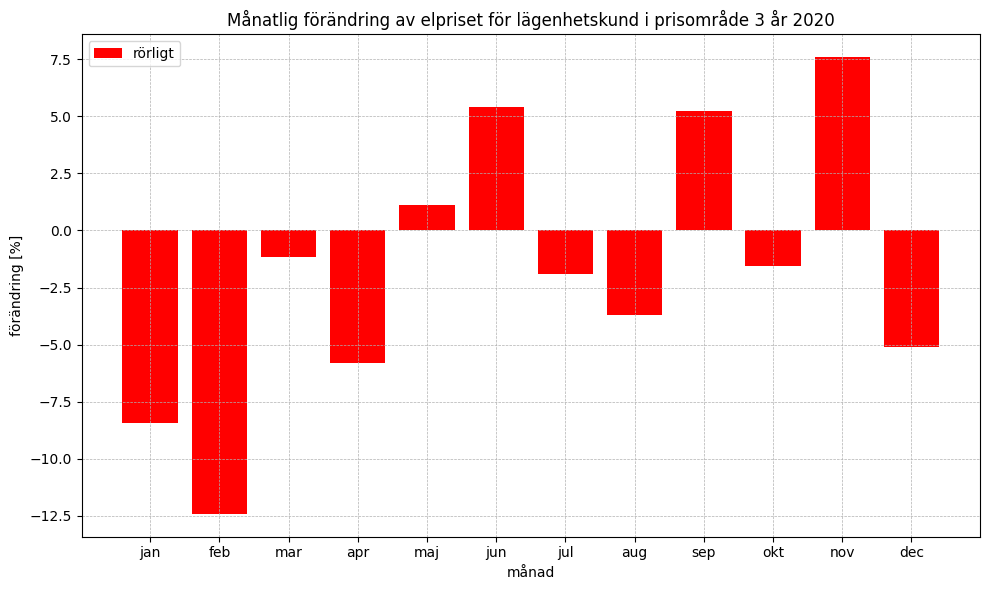

In [79]:
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")


def calculate_ff(data):

    ff_permonth = []
    for i, value in enumerate(data[1:], start=1):
        try:
            ff = ((value - data[i-1])/ data[i-1]) * 100
            ff = round(ff, 2)
            ff_permonth.append(ff)
        except:
            pass
    return ff_permonth


def main_deluppgift4 ():
    #Hämtar kund input
    customer = get_customer_input()
    prisavtal = get_prisavtal()
    prisområde = get_prisområde()
    år = get_year_input()
    
    #Splittar datan för villa samt lägenhet och tar ut endast den data som är för det valada året.
    previous_year = int(år) - 1
    year_list_lgh = []
    year_list_villa = []
    for line in lghData:
        if line[0] == str(previous_year) and line[1] == "december":
            year_list_lgh.append(line)
        elif line[0] == år:
            year_list_lgh.append(line)

    for line in villaData:
        if line[0] == str(previous_year) and line[1] == "december":
            year_list_villa.append(line)
        elif line[0] == år:
            year_list_villa.append(line)


    #Beroende på customer input definerar vi variabeln data till den korrekta datan.
    #Vi definerar även en string så att den kan skrvias ut i rubriken
    if customer in ["V", "v"]:
        data = year_list_villa
        kund = "villakund"
    else:
        data = year_list_lgh
        kund = "lägenhetskund"

    # Define a mapping from contract type and area to column index
    column_mapping = {
        ("1", "F1"): 2,
        ("1", "F3"): 3,
        ("1", "R"): 4,
        ("2", "F1"): 5,
        ("2", "F3"): 6,
        ("2", "R"): 7,
        ("3", "F1"): 8,
        ("3", "F3"): 9,
        ("3", "R"): 10,
        ("4", "F1"): 11,
        ("4", "F3"): 12,
        ("4", "R"): 13
    }

    # Get the appropriate column index
    column_index = column_mapping.get((prisområde, prisavtal))

    values_data = []
    for line in data:
        values_data.append(float(line[column_index]))

    ff_data = calculate_ff(values_data)

    if len(ff_data) == 11:
        #Definerar värderna på x-axeln eftersom de är statiska oberoende av kund/användare val
        x_values = ["feb", "mar", "apr", "maj", "jun", "jul", "aug", "sep", "okt", "nov", "dec"]
        print(1)
    else:
        #Definerar värderna på x-axeln eftersom de är statiska oberoende av kund/användare val
        x_values = ["jan", "feb", "mar", "apr", "maj", "jun", "jul", "aug", "sep", "okt", "nov", "dec"]

    plt.figure(figsize=(10,6))

    plt.bar(x_values, ff_data, color="red", label="rörligt")
    plt.title(f"Månatlig förändring av elpriset för {kund} i prisområde {prisområde} år {år}")
    plt.xlabel('månad')
    plt.ylabel('förändring [%]')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()
  
main_deluppgift4()


## Deluppgift 5
Ev. kommentar:

                      Lägsta-, högsta- och medelvärde av elpriserna.
                     under tidsperioden 2018-2023 för rörligt avtal.

Prisomr.    lägsta        år        mån          högsta        år        mån       medel  
------------------------------------------------------------------------------------------
Kategori lägenhetskund:
SE1        35.28        2020        apr          303.96        2022      dec       85.36
SE2        34.66        2020        apr          305.86        2022      dec       86.17
SE3        37.81        2020        jul          394.88        2022      dec       111.66
SE4        45.42        2020        maj          426.37        2022      aug       125.15
Kategori villakund:
SE1        17.82        2020        apr          284.43        2022      dec       68.01
SE2        17.58        2020        apr          286.79        2022      dec       68.87
SE3        21.72        2020        jul          375.08        2022      dec       94.37
SE4       

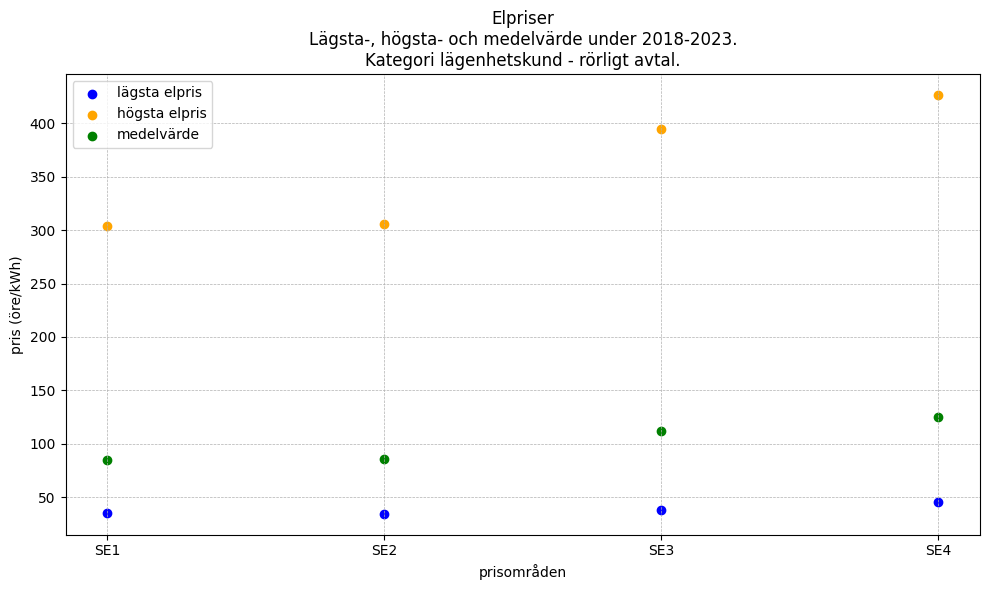

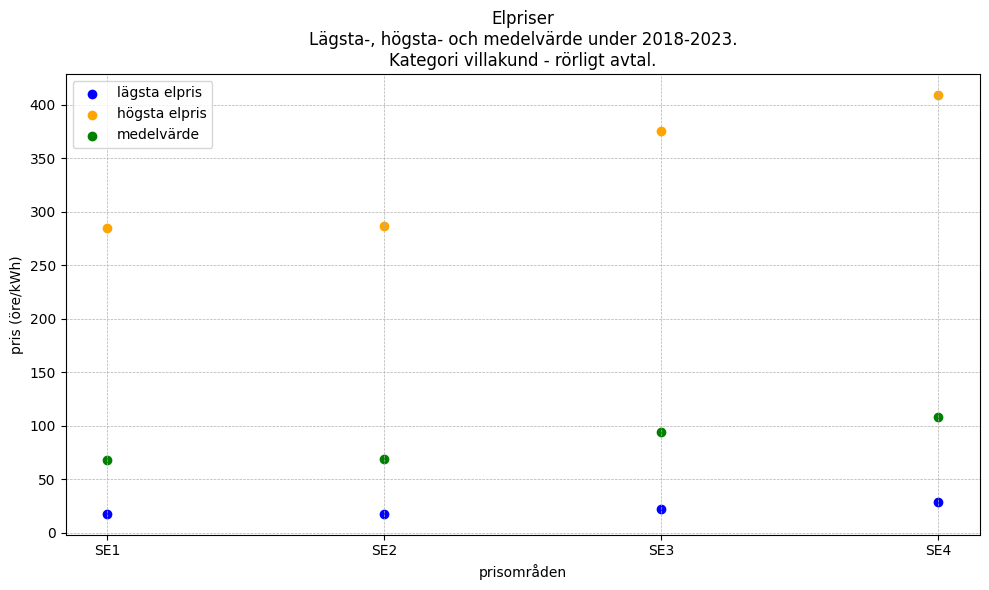

In [91]:
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")


def plot_diagram(customer_type, prisavtal_str, min_max_avg_list):
        SE_X_strings = ["SE1", "SE2", "SE3", "SE4"]

        plt.figure(figsize=(10, 6))
        plt.scatter(SE_X_strings, min_max_avg_list[0], color='blue', label="lägsta elpris")
        plt.scatter(SE_X_strings, min_max_avg_list[1], color='orange', label="högsta elpris")
        plt.scatter(SE_X_strings, min_max_avg_list[2], color='green', label="medelvärde")
        plt.title(f"Elpriser\nLägsta-, högsta- och medelvärde under 2018-2023.\nKategori {customer_type} - {prisavtal_str}")
        plt.xlabel("prisområden")
        plt.ylabel("pris (öre/kWh)")
        plt.legend(loc="upper left")
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.tight_layout()
        plt.show()


def main_deluppgift5 ():

    prisavtal = get_prisavtal()

    prisavtalSTR_mapping = {
        "F1": "fast avtal - 1år.",
        "F3": "fast avtal - 3år.",
        "R" : "rörligt avtal."
    }
    prisavtal_str = prisavtalSTR_mapping.get(prisavtal)

    # Define a mapping from contract type and area to column index
    column_mapping = {
        "F1": (2, 5, 8, 11),
        "F3": (3, 6, 9, 12),
        "R" : (4, 7, 10, 13)
    }

    column_index_list = column_mapping.get(prisavtal)

    min_max_SE1_4_lgh = []
    avrage_list_lgh = []
    for index in column_index_list:
        min_max_SE1_4_lgh.append(get_min_max_value(index, lghData[1:]))
        avrage_list_lgh.append(calculate_avg(index, lghData[1:]))

    min_max_SE1_4_villa = []
    avrage_list_villa = []
    for index in column_index_list:
        min_max_SE1_4_villa.append(get_min_max_value(index, villaData[1:]))
        avrage_list_villa.append(calculate_avg(index, villaData[1:]))

    print("==========================================================================================")
    print("                      Lägsta-, högsta- och medelvärde av elpriserna.")
    print(f"                     under tidsperioden 2018-2023 för {prisavtal_str}")
    print("")
    print("Prisomr.    lägsta        år        mån          högsta        år        mån       medel  ")
    print("------------------------------------------------------------------------------------------")
    print("Kategori lägenhetskund:")
    for index, value in enumerate(min_max_SE1_4_lgh):
        #       Prisomr.                lägsta                    år               mån                   högsta                   år                   mån                  medel"
        print(f"SE{index + 1}        {value[0][0]:<5}        {value[2][0]}        {value[1][0]}          {value[0][1]:<5}        {value[2][1]}      {value[1][1]}       {avrage_list_lgh[index]}")
    print("Kategori villakund:")
    for index, value in enumerate(min_max_SE1_4_villa):
        #       Prisomr.                lägsta                    år               mån                   högsta                   år                   mån                  medel"
        print(f"SE{index + 1}        {value[0][0]:<5}        {value[2][0]}        {value[1][0]}          {value[0][1]:<5}        {value[2][1]}      {value[1][1]}       {avrage_list_villa[index]}")
    print("==========================================================================================")
    
    min_values_lgh = []
    max_values_lgh = []
    for value in min_max_SE1_4_lgh:
        min_values_lgh.append(value[0][0])
        max_values_lgh.append(value[0][1])

    min_values_villa = []
    max_values_villa = []
    for value in min_max_SE1_4_villa:
        min_values_villa.append(value[0][0])
        max_values_villa.append(value[0][1])

    min_max_avg_list_lgh = [min_values_lgh, max_values_lgh, avrage_list_lgh]
    min_max_avg_list_villa = [min_values_villa, max_values_villa, avrage_list_villa]

    plot_diagram("lägenhetskund", prisavtal_str, min_max_avg_list_lgh)

    plot_diagram("villakund", prisavtal_str, min_max_avg_list_villa)


    
main_deluppgift5()